In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Loading

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_train= pd.read_excel('/content/drive/My Drive/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data=df_train.copy()

In [ ]:

print("Number of rows in training dataset",df_train.shape)

Number of rows in training dataset (10683, 11)


#  Data Preprocessing


In [ ]:
# Checking and Removing NUll Values

null_columns=df_train.columns[df_train.isnull().any()]
print(df_train[df_train.isnull().any(axis=1)][null_columns].head())
df_train.dropna(inplace=True)


     Route Total_Stops
9039   NaN         NaN


In [ ]:
#removing duplicate rows in training dataset

df_train.drop_duplicates(keep='first',inplace=True)

In [ ]:
print("Train set:\n",df_train["Additional_Info"].value_counts())

Train set:
 No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [ ]:
# replacing repeating value in train set
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

# Feature Engineering

In [ ]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

Text(0.5, 1.0, 'Total stops')

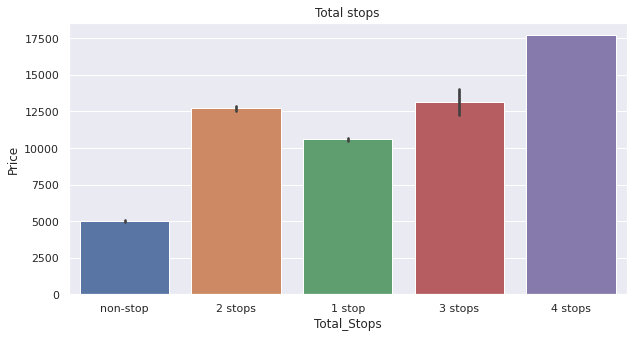

In [ ]:
# plotting price Vs Total stops

sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=train_data)
plt.title('Total stops')

In [ ]:
# Assigning numerical values to stops

df_train.Total_Stops.replace(['non-stop','1 stop', '2 stops', '3 stops', '4 stops'], [0,1, 2, 3, 4], inplace=True)
df_train["Total_Stops"] = df_train["Total_Stops"].astype(int)

In [ ]:
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662


In [ ]:
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

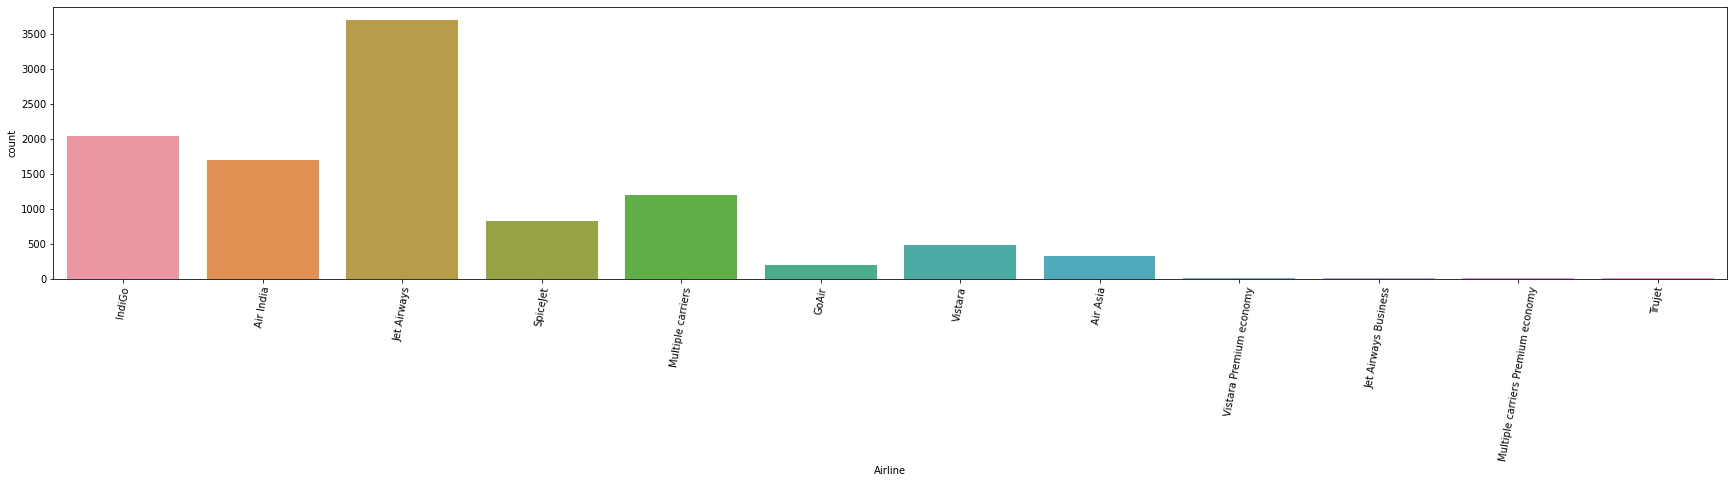

In [ ]:

plt.figure(figsize=(30,5))
sns.countplot(x = 'Airline',data =df_train)
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text major ticklabel objects>)

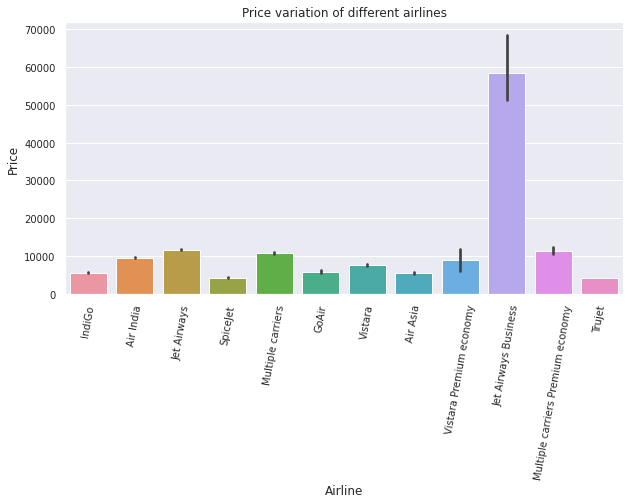

In [ ]:
sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Airline", y="Price", data=train_data)
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

In [ ]:

Airlines= pd.get_dummies(df_train[['Airline']],prefix="Airline",drop_first=True)
Airlines.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_train=pd.concat([df_train,Airlines],axis=1)
df_train.head(2)



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0


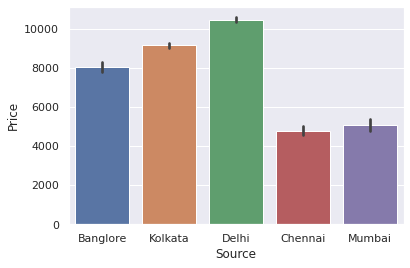

In [ ]:
#Plotting price Vs Source of the flight
sns.barplot(y = 'Price',x = 'Source',data =df_train)

In [ ]:


Source = pd.get_dummies(df_train[["Source"]],prefix='Source',drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
df_train=pd.concat([df_train,Source],axis=1)
df_train.head(2)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:

Destination = pd.get_dummies(df_train[["Destination"]],prefix='Dest', drop_first = True)
Destination.head()

,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
df_train=pd.concat([df_train,Destination],axis=1)
df_train.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_train.drop(["Airline","Source","Destination"], axis = 1, inplace = True)

In [ ]:

df_train.shape

(10462, 28)

In [ ]:

# Extract day and month of journey from the above column in  train data

# df_train["isWeekend"] = ((pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df_train["Day_of_Week"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df_train["Day_Of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day
df_train["Month_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.month


In [ ]:
df_train.head(2)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5


In [ ]:
# Drop original feature from train and test dataset 

df_train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)


In [ ]:
#  Arrival time 
df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ').str[0]
df_train['Arrival_Hour'] = df_train['Arrival_Time'] .str.split(':').str[0]
df_train['Arrival_Minute'] =df_train['Arrival_Time'] .str.split(':').str[1]
df_train['Arrival_Hour']=df_train['Arrival_Hour'].astype(int)
df_train['Arrival_Minute']=df_train['Arrival_Minute'].astype(int)
df_train=df_train.drop(['Arrival_Time'],axis=1)


In [ ]:
#  Departure Time
df_train['Departure_Hour'] = df_train['Dep_Time'] .str.split(':').str[0]
df_train['Departure_Minute'] =df_train['Dep_Time'] .str.split(':').str[1]

df_train['Departure_Hour']=df_train['Departure_Hour'].astype(int)
df_train['Departure_Minute']=df_train['Departure_Minute'].astype(int)
df_train=df_train.drop(['Dep_Time'],axis=1)


In [ ]:
df_train.head(2)

,Route,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,BLR → DEL,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3,1,10,22,20
1,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5,13,15,5,50


In [ ]:
# Duration column

df_train['Duration_hour']=df_train.Duration.str.split(' ').str[0]
df_train['Duration_min']=df_train.Duration.str.split(' ').str[1]

df_train['Dur_hour']=df_train.Duration_hour.str.split('h').str[0]
df_train['Dur_min']=df_train.Duration_min.str.split('m').str[0]


df_train['Dur_min'].fillna("0",inplace=True)
df_train['Dur_hour'].fillna("0",inplace=True)

df_train['Dur_hour']=df_train['Dur_hour'].replace('5m','0')


df_train['Dur_hour']=df_train['Dur_hour'].astype(int)
df_train['Dur_min']=df_train['Dur_min'].astype(int)

df_train['Total_Duration']=df_train['Dur_hour']*60+df_train['Dur_min']



In [ ]:
df_train.head(2)

,Route,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_min,Dur_hour,Dur_min,Total_Duration
0,BLR → DEL,2h 50m,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3,1,10,22,20,2h,50m,2,50,170
1,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5,13,15,5,50,7h,25m,7,25,445


In [ ]:
df_train.drop(columns=['Duration','Duration_hour','Duration_min','Dur_hour','Dur_min'],inplace=True)


In [ ]:
df_train.head(2)

,Route,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Duration
0,BLR → DEL,0,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Sunday,24,3,1,10,22,20,170
1,CCU → IXR → BBI → BLR,2,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Wednesday,1,5,13,15,5,50,445


In [ ]:
df_train.columns

Index(['Route', 'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Dest_Cochin', 'Dest_Delhi', 'Dest_Hyderabad', 'Dest_Kolkata',
       'Dest_New Delhi', 'Day_of_Week', 'Day_Of_Journey', 'Month_of_Journey',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute',
       'Total_Duration'],
      dtype='object')

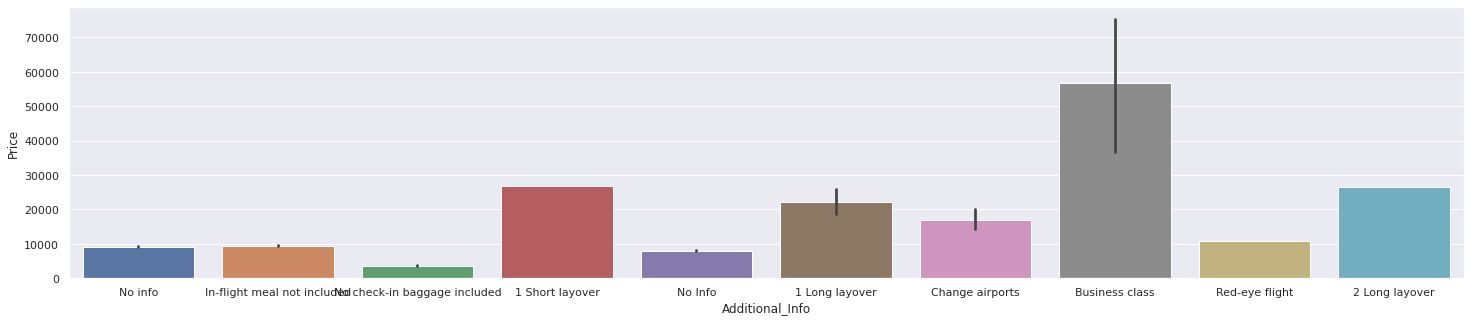

In [ ]:
#Plotting price Vs given additional info

figure(figsize=(25,5)) 
sns.barplot(y = 'Price',x= 'Additional_Info',data=train_data)

In [ ]:
df_train["Additional_Info"].replace(to_replace={'Change airports':'Other', 
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',
                                                        '1 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df_train["Day_of_Week"]=encoder.fit_transform(df_train['Day_of_Week'])
df_train['Additional_Info']=encoder.fit_transform(df_train['Additional_Info'])

In [ ]:
train_df=df_train.copy()

#EDA

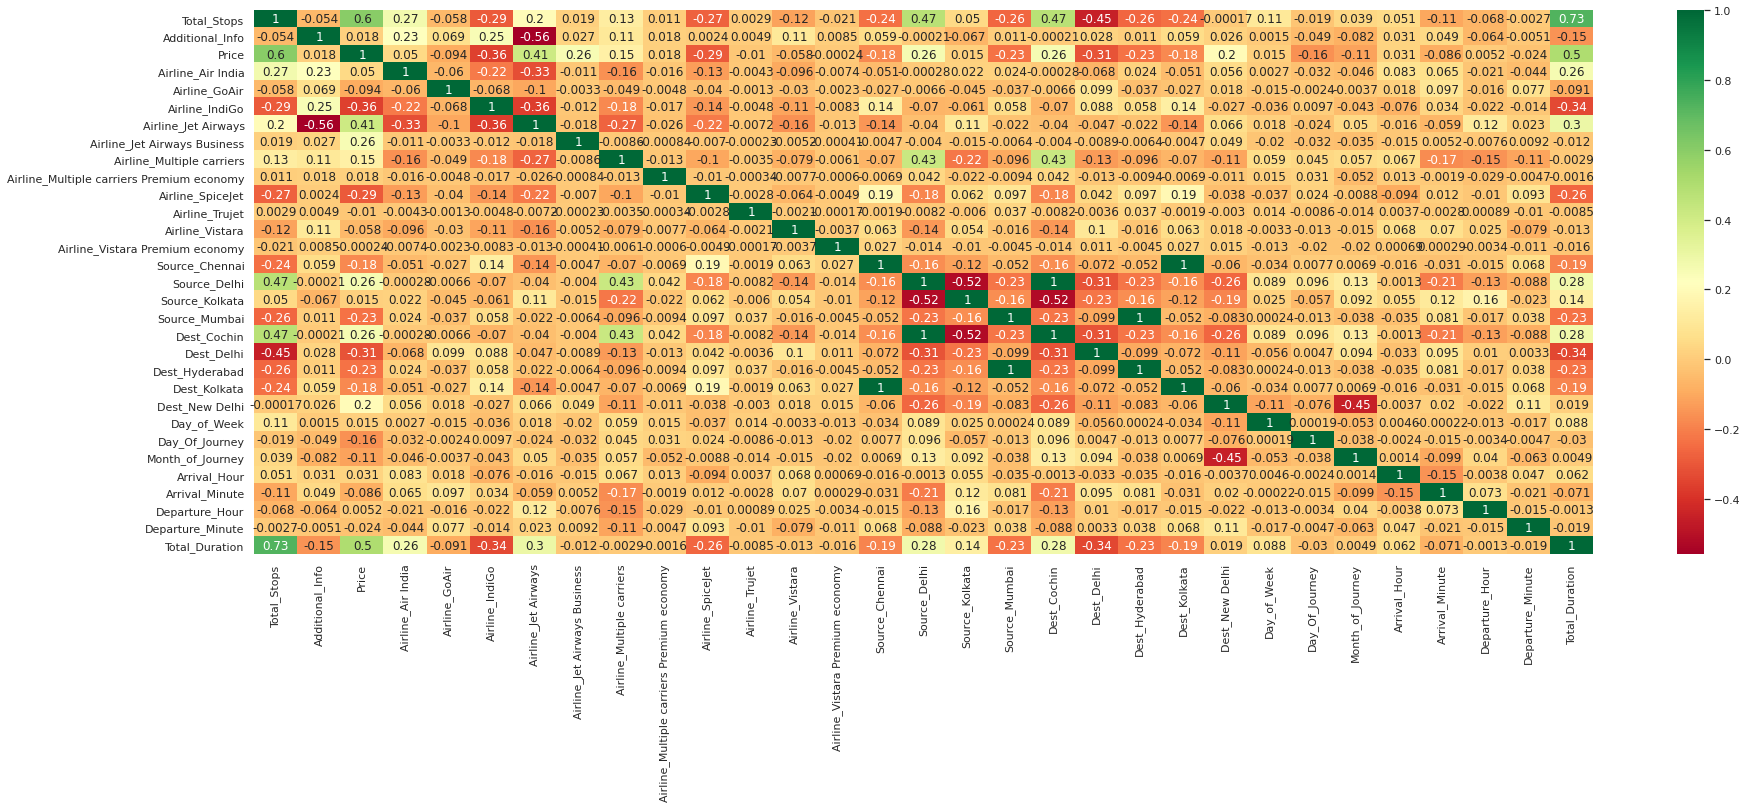

In [ ]:
# plotting correlation plot 

corrmat =train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,10))
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 1.0, 'Total stops')

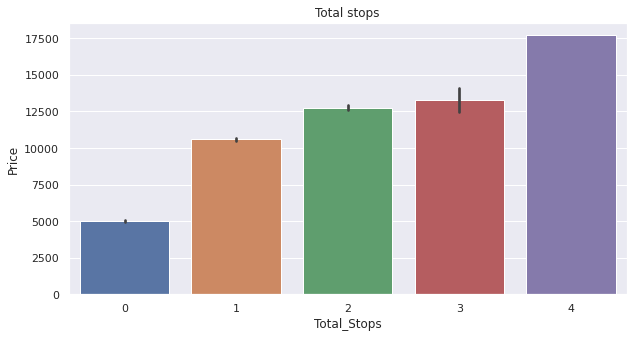

In [ ]:
# # plotting price Vs Total stops

sns.set(style="darkgrid")
figure(figsize=(10,5)) 
sns.barplot(x="Total_Stops", y="Price", data=train_df)
plt.title('Total stops')

In [ ]:
train_df.drop(["Route"], axis = 1, inplace = True)

#Model Selection and Predictions

In [ ]:
price=train_df['Price']
features=train_df.drop(columns=['Price'])


In [ ]:
price.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
features.head(2)

,Total_Stops,Additional_Info,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Day_of_Week,Day_Of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Total_Duration
0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,24,3,1,10,22,20,170
1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,5,13,15,5,50,445


In [ ]:
# splitting the training dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,price,test_size=0.25,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7846, 30)
(7846,)
(2616, 30)
(2616,)


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

#function for plotting report

def print_accuracy_report(y_test, y_pred,X_test, model):
  print('R Squared(Accuracy)', metrics.r2_score(y_test, y_pred))   
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[2.27597001e-01 8.05385031e-02 1.03720641e-02 1.80553101e-03
 1.60224209e-02 1.32111745e-01 8.71763986e-02 1.89382365e-02
 7.64716737e-04 3.30361358e-03 1.82718410e-04 4.90873118e-03
 1.78555460e-04 5.24040249e-04 9.86842454e-03 4.21653470e-03
 5.64050754e-03 7.49834570e-03 1.12118473e-02 4.98926527e-03
 5.59342414e-04 2.39821810e-02 3.14152387e-02 7.43873064e-02
 4.55538198e-02 2.46991432e-02 1.84554129e-02 2.11015416e-02
 2.20788609e-02 1.09917953e-01]


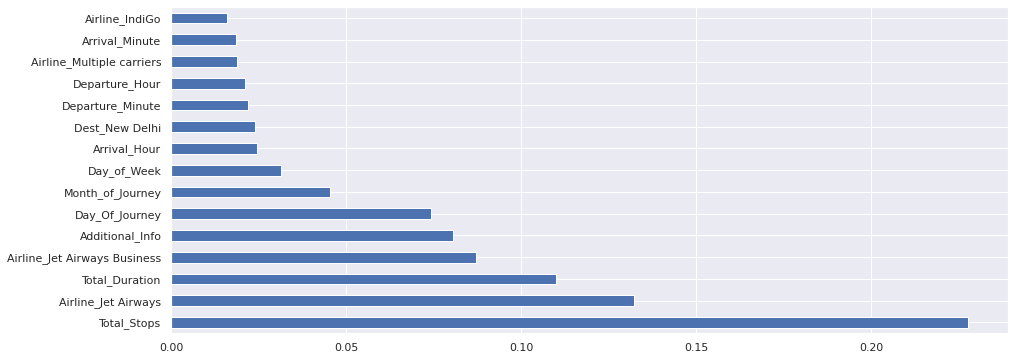

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (15,6))
feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
#using random forest regressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor=RandomForestRegressor()
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
min_samples_split=[5,10,15,20,30,40]
min_samples_leaf=[5,10,15,20,30,40]

In [ ]:
hyperparameter_rfr = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [ ]:
rfr_cv =  RandomizedSearchCV(random_forest_regressor,hyperparameter_rfr,cv=5,n_jobs = -1,verbose = 5,scoring ='neg_mean_squared_log_error',n_iter=10)

In [ ]:
rfr_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rfr_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rfr = rfr_cv.best_estimator_.predict(x_test)
print(print_accuracy_report(y_test, y_pred_rfr, x_test, rfr_cv.best_estimator_))

R Squared(Accuracy) 0.8686930973089082
Mean Absolute Error: 791.6105882979937
Mean Squared Error: 2784561.6936752615
Root Mean Squared Error: 1668.700600370019
Root Mean Squared Log Error 0.1403971027539817
None


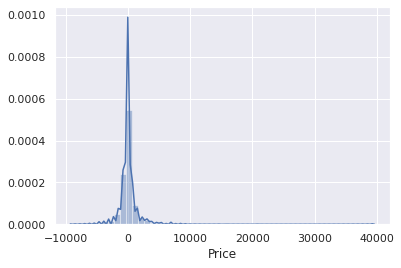

In [ ]:
sns.distplot(y_test-y_pred_rfr)

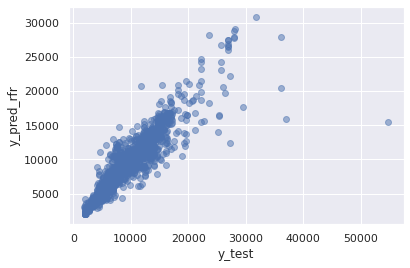

In [ ]:

plt.scatter(y_test, y_pred_rfr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rfr")
plt.show()

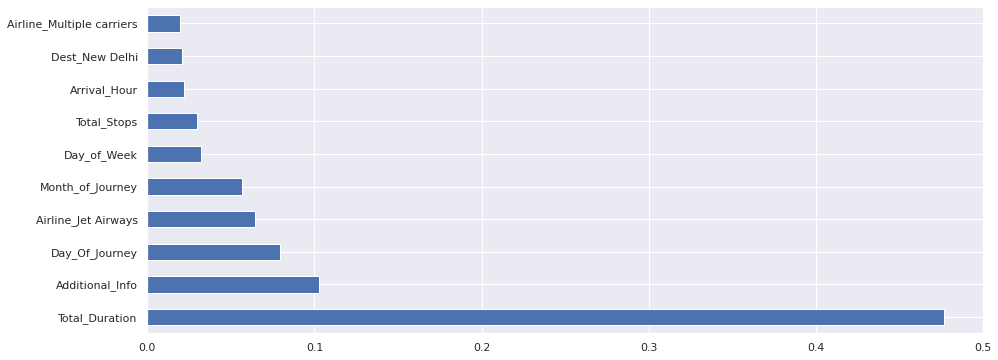

In [ ]:
plt.figure(figsize = (15,6))
feat_importances = pd.Series(rfr_cv.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#using xgboost

import xgboost
xgb_regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
learning_rate=[0.01,0.05,0.1,0.15,0.20]


In [ ]:
hyperparameter_xgb = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score,
    }

In [ ]:
xgb_cv = RandomizedSearchCV(estimator=xgb_regressor,
            param_distributions=hyperparameter_xgb,
            cv=5,
            n_iter=10,
            scoring ='neg_mean_squared_log_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
xgb_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.1min finished


[11:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          verbosity=1),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1

In [ ]:
xgb_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:

y_pred_xgb = xgb_cv.best_estimator_.predict(x_test) 
print(print_accuracy_report(y_test, y_pred_xgb, x_test, rfr_cv.best_estimator_))

R Squared(Accuracy) 0.8752888479487131
Mean Absolute Error: 690.3438438858825
Mean Squared Error: 2644688.8142132987
Root Mean Squared Error: 1626.249923662811
Root Mean Squared Log Error 0.13773497547859123
None


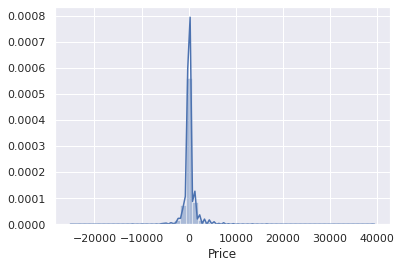

In [ ]:
sns.distplot(y_test-y_pred_xgb)

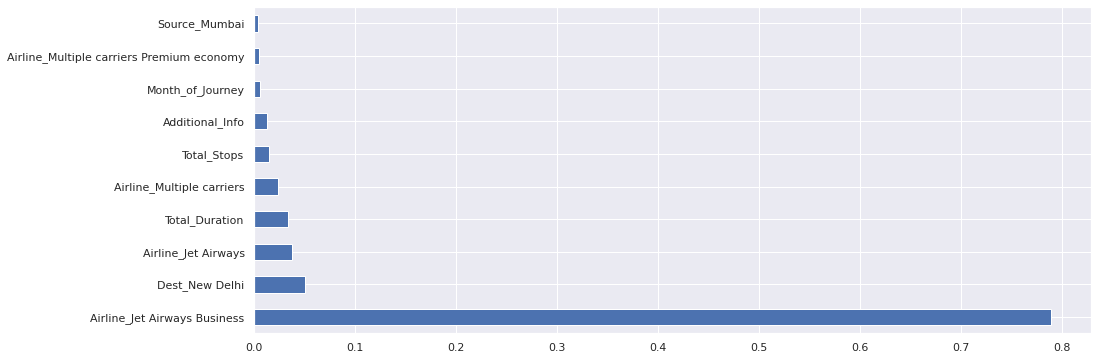

In [ ]:
plt.figure(figsize = (15,6))
feat_importances = pd.Series(xgb_cv.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

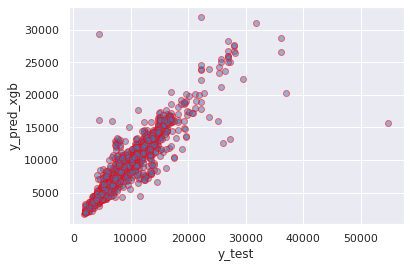

In [ ]:
plt.scatter(y_test, y_pred_xgb, alpha = 0.5,edgecolors='red')
plt.xlabel("y_test")
plt.ylabel("y_pred_xgb")
plt.show()

In [ ]:
# print(selection.feature_importances_)

In [ ]:
# #plot graph of feature importances for better visualization

# plt.figure(figsize = (15,6))
# feat_importances = pd.Series(selection.feature_importances_, index=x_train.columns)
# feat_importances.nlargest(15).plot(kind='barh')
# plt.show()

In [ ]:
import pickle
pickle.dump(rfr_cv.best_estimator_,open('FFP_model.pkl','wb'))
